In [1]:
import pandas as pd

In [2]:
def func(timePath, responsePath):
    time_df = pd.read_csv(timePath)
    time_df['attentive'] = 1
    old = 0
    resp_df = pd.read_csv(responsePath)
    for index, row in resp_df.iterrows():
        if(row[' Correct'] == ' Yes'):
            old = row['Elapsed Time (ms)']
            continue
        new = row['Elapsed Time (ms)']
        time_df.loc[(time_df['Elapsed Time (ms)'] >= old) & (time_df['Elapsed Time (ms)'] <= new), 'attentive'] = 0
    
    # Update time_df and remove old ' Pitch' and ' Roll' columns
    time_df[' Pitch'] = round(((time_df[' Pitch'] + 180) % 360), 2)
    time_df[' Roll'] = round(((time_df[' Roll'] + 180) % 360), 2)
    # time_df[' Yaw'] = round(((time_df[' Yaw'] + 180) % 360), 2)
    
    # time_df = time_df.drop(['Elapsed Time (ms)', ' Alphabet'], axis=1)
    # dataset = timeseries_dataset_from_array(np.asarray(time_df)[: -timeStamps], np.asarray(time_df['attentive'])[timeStamps:], 10, batch_size=71000)
    # for index, batch in enumerate(dataset):
    #     features, labels = batch
        
       
    return time_df
    
df = func('../data/timeFile_1.csv', '../data/responseFile_1.csv')


In [3]:
# List of response and time file paths
response_files = ['responseFile_1.csv', 'responseFile_3.csv', 'responseFile_4.csv', 'responseFile_5.csv', 'responseFile_6.csv', 'responseFile_7.csv']
time_files = ['timeFile_1.csv', 'timeFile_3.csv', 'timeFile_4.csv', 'timeFile_5.csv', 'timeFile_6.csv', 'timeFile_7.csv']

total = pd.DataFrame()
for time_file, response_file in zip(time_files, response_files):
  df = func('../data/' + time_file, '../data/' + response_file)
  total = pd.concat([total, df], ignore_index=True)

In [4]:
total.to_csv('../data/arima_data.csv', index=False)

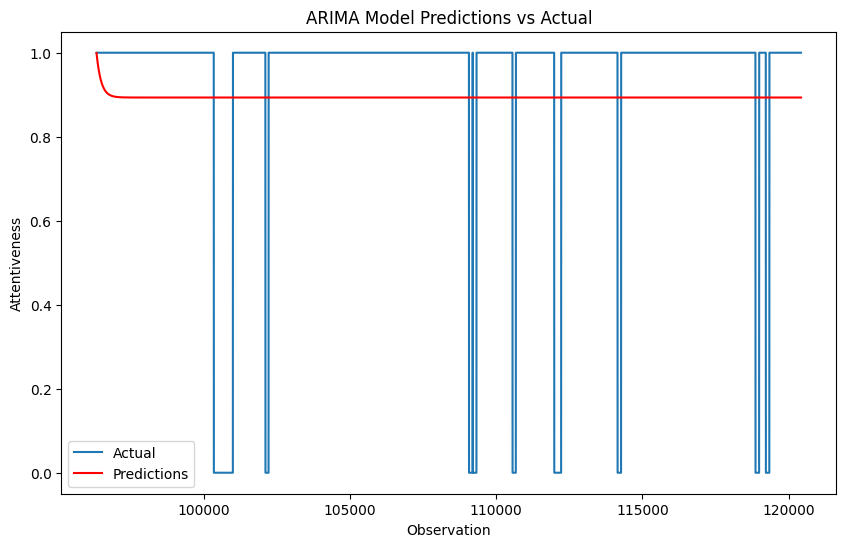

Model Mean Squared Error: 0.06766974745094459
Train Mean Squared Error: 0.0012003825779745212


In [5]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def main(csv_file):
    # Step 1: Read the CSV File
    data = pd.read_csv(csv_file)
    
    # Assuming each row in 'attentive' represents a sequential time point
    attentive_series = data['attentive']
    
    # Step 2: Split Data into Train and Test Sets
    # We'll use 80% of the data for training and the remaining 20% for testing
    split_point = int(len(attentive_series) * 0.8)
    train, test = attentive_series[0:split_point], attentive_series[split_point:]
    
    # Step 3: Fit ARIMA Model on Training Data
    # Using default ARIMA parameters (p=1, d=0, q=0)
    model = ARIMA(train, order=(1, 0, 0))
    model_fit = model.fit()
    
    # Step 4: Predict on Test Data
    predictions = model_fit.forecast(steps=len(test))
    
    # Step 5: Evaluate Model Accuracy
    mse = mean_squared_error(test, predictions)
    train_mse = mean_squared_error(train, model_fit.fittedvalues)
    
    # Step 6: Display Results
    plt.figure(figsize=(10, 6))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predictions')
    plt.title('ARIMA Model Predictions vs Actual')
    plt.xlabel('Observation')
    plt.ylabel('Attentiveness')
    plt.legend()
    plt.show()

    print(f'Model Mean Squared Error: {mse}')
    print(f'Train Mean Squared Error: {train_mse}')

# Run the main function with the path to your CSV file
csv_file_path = 'arima_data.csv' # Replace with the path to your CSV file
main(csv_file_path)

In [6]:
# run statiarry data test
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def main(csv_file):
    # Step 1: Read the CSV File
    data = pd.read_csv(csv_file)
    
    # Assuming each row in 'attentive' represents a sequential time point
    attentive_series = data['attentive']
    
    # Step 2: Run Augmented Dickey-Fuller Test
    result = adfuller(attentive_series)
    
    # Step 3: Display Results
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
        
# Run the main function with the path to your CSV file
csv_file_path = 'arima_data.csv' # Replace with the path to your CSV file
main(csv_file_path)


ADF Statistic: -19.08232362730753
p-value: 0.0
Critical Values:
1%: -3.430404314280931
5%: -2.861564006106054
10%: -2.5667827776024135
